# Tutorial Pandas
### Tarea 2 - Andrea Exarahi - Fabian Gomez

**Pandas** es una herramienta disponible para importar y administrar conjuntos de datos. Pandas y Numpy son básicamente esenciales para el preprocesamiento de datos.

## Librerias o dependencias necesarias para este tutorial

In [1]:
import numpy as np
import pandas as pd

## Manejo de estructuras de datos con pandas
### Series
Una serie es una matriz unidimensional. Las series de pandas pueden tener etiquetas de acceso con las que se puede trabajar por medio de indeces.

En el codigo de abajo se puede visualizar la sintaxis básica de como crear Series en pandas

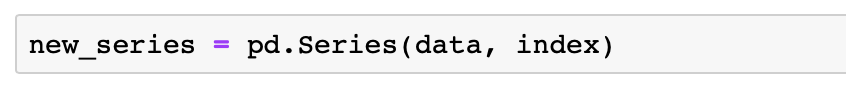

En este código, **data** puede ser cualquier objeto como un diccionario, lista o array,  **index** es una etiqueta del eje en donde van a ser indexados los objetos.

Como ejemplo vamos a una serie que va a contener nombres de frutas como etiquetas/index y los gramos de cada una que va a ser nuestra data:

In [2]:
food = ['tomato', 'strawberrys', 'watermelon', 'avocato']
data = [50,100,500,150]
new_series = pd.Series(data, food)

Los index son opcionales. Se pueden agregar u omitir; si son omitidos Pandas creará un índice predeterminado con valores [0, ..., len (data) - 1] como en el siguiente ejemplo:

In [3]:
new_serie2 = pd.Series(data)
new_serie2

0     50
1    100
2    500
3    150
dtype: int64

Además, se pueden crear *Series* basados en *Arrays de Numpy* o en *diccionarios de Python*

#### Series basados en Arrays de Numpy

In [4]:
np_array = np.array(data)
pd.Series(np_array)

0     50
1    100
2    500
3    150
dtype: int64

#### Series basados en Diccionarios de Python

In [5]:
py_dict = {'a':50,'b':100,'c':500,'d':130}
pd.Series(py_dict)

a     50
b    100
c    500
d    130
dtype: int64

Como se puede visualizar, cada vez que crea una *Serie* desde un diccionario de Python, Pandas establece los keys del diccionario como el index de la Serie, y establece los valores como el punto de datos correspondiente.

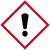
*Una de las caracteristicas importantes de las Series de Pandas es que pueden contener una variedad de tipos de objetos.*

#### Obtener información de Series

Se puede obtener informaciòn de la Serie al igual que como se maneja un diccionario de Python

In [6]:
series1 = pd.Series([50,100,500,150],['tomate','fresas','sandia','aguacate'])
series2 = pd.Series([70,30,300,89],['manzana','fresas','sandia','tomate'])

In [7]:
series1['tomate']

50

#### Operaciones aritmetricas con series

Las operaciones aritmeticas se realizan donde las series hacen match. De lo contrario, donde Pandas no pudo encontrar una coincidencia en la Serie, le da un valor de NaN.

In [8]:
series1 - series2

aguacate      NaN
fresas       70.0
manzana       NaN
sandia      200.0
tomate      -39.0
dtype: float64

In [9]:
series1 + series2

aguacate      NaN
fresas      130.0
manzana       NaN
sandia      800.0
tomate      139.0
dtype: float64

In [10]:
series1 * series2

aguacate         NaN
fresas        3000.0
manzana          NaN
sandia      150000.0
tomate        4450.0
dtype: float64

### DataFrames

Un DataFrame es una estructura de datos bidimensional en la que los datos se alinean en forma tabular, es decir, en filas y columnas. Los DataFrames de Pandas facilitan la manipulación de tus datos, se puede seleccionar o reemplazar columnas y filas, incluso se puede remodelar datos.

En el codigo de abajo se puede visualizar la sintaxis básica de como un dataframe en pandas

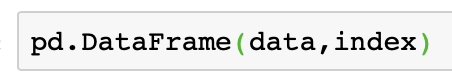

A continuación definiremos un dataframe compuesto por números random generados utilizando la función random.rand de numpy, la cual retorna una muestra (o muestras) de la distribución "normal estándar".

In [11]:
df1 = pd.DataFrame(np.random.randn(6,4),['A','B','C','D','E','F'],['X','Y','Z','W'])
df1

,X,Y,Z,W
A,-1.183071,0.255921,1.008828,1.083035
B,1.384581,-0.323911,1.435151,0.310097
C,0.174291,1.036262,-2.487363,0.169755
D,0.614018,1.210335,0.767073,0.439415
E,0.762857,-0.023921,0.774007,0.614136
F,0.465367,1.223292,-0.636871,1.070419


Cada una de las columnas anteriores es en realidad solo una Serie y todas comparten un índice común. Por lo tanto, es seguro decir que un DataFrame es una colección de Series que comparten el mismo índice.

#### Dataframe con diccionario de series

In [12]:
df2 = {'Name': pd.Series(['Lara', 'Jim', 'Fabian','Andrea'],index=['a','b','c','d']),
      'Gender':pd.Series(['F', 'M', 'M'],index=['a','b','c']),
       'Age':pd.Series([13, 30, 20],index=['a','c','d'])
      }
pd.DataFrame(df2)

,Name,Gender,Age
a,Lara,F,13.0
b,Jim,M,NaN
c,Fabian,M,30.0
d,Andrea,NaN,20.0


Como se puede visualizar si hace falta un dato o indeces el dataframe asigna un valor NaN
#### Dataframe con diccionario de listas

In [13]:
data = {'Name': ['Lara', 'Jim', 'Fabian','Andrea'],
      'Gender': ['F', 'M', 'M','F'],
       'Age': [13, 30, 20,15]
      }
df = pd.DataFrame(data,index= ['a','b','c','d'])
df

,Name,Gender,Age
a,Lara,F,13
b,Jim,M,30
c,Fabian,M,20
d,Andrea,F,15


#### Seleccionar columnas de un dataframe

Se pueden seleccionar las columnas de un data frame por medio de [ ].

In [14]:
df['Name']

a      Lara
b       Jim
c    Fabian
d    Andrea
Name: Name, dtype: object

En el caso anterior se selecciono solo una columna, y esta es de tipo *Series*, pero esto se pude confirmar por medio de la funcion *type()*

In [15]:
type(df['Name'])

pandas.core.series.Series

Si se seleccionaran varias columnas el resultado seria de tipo *DataFrame*.

In [16]:
df[['Name','Age']]

,Name,Age
a,Lara,13
b,Jim,30
c,Fabian,20
d,Andrea,15


In [17]:
type(df[['Name','Age']])

pandas.core.frame.DataFrame

#### Agregar columnas a un DataFrame
Se puede agregar una columna por medio de *Series* al *DataFrame*.

In [18]:
df['Last_name'] = pd.Series(['Lane','Earthworm','Gomez','Exarahi'],['a','b','c','d'])
df

,Name,Gender,Age,Last_name
a,Lara,F,13,Lane
b,Jim,M,30,Earthworm
c,Fabian,M,20,Gomez
d,Andrea,F,15,Exarahi


También se puede agregar una columna resultado de una operación

In [19]:
df['Full_name'] = df['Last_name'] + df['Name']
df

,Name,Gender,Age,Last_name,Full_name
a,Lara,F,13,Lane,LaneLara
b,Jim,M,30,Earthworm,EarthwormJim
c,Fabian,M,20,Gomez,GomezFabian
d,Andrea,F,15,Exarahi,ExarahiAndrea


#### Remover filas o columnas de un DataFrame
Podemos eliminar una fila o una columna usando la función .drop (). Al hacer esto, tenemos que especificar el eje = 0 para la fila, y el eje = 1 para la columna.

In [20]:
df.drop('Full_name', axis=1)

,Name,Gender,Age,Last_name
a,Lara,F,13,Lane
b,Jim,M,30,Earthworm
c,Fabian,M,20,Gomez
d,Andrea,F,15,Exarahi


In [21]:
df.drop('d', axis=0)

,Name,Gender,Age,Last_name,Full_name
a,Lara,F,13,Lane,LaneLara
b,Jim,M,30,Earthworm,EarthwormJim
c,Fabian,M,20,Gomez,GomezFabian


Pandas no elimina una fila / columna de forma permanente cada vez que se utiliza el método .drop () a menos que se le indique. Esto es así para evitar se pierda accidentalmente datos.

Para eliminar de forma permanente una fila / columna, debe establecer inplace = True como:

In [22]:
df #no se elimino ni la fila ni la columna en un nuevo llamado del dataFrame

,Name,Gender,Age,Last_name,Full_name
a,Lara,F,13,Lane,LaneLara
b,Jim,M,30,Earthworm,EarthwormJim
c,Fabian,M,20,Gomez,GomezFabian
d,Andrea,F,15,Exarahi,ExarahiAndrea


In [23]:
df.drop('Full_name', axis=1, inplace = True) #se elimina permanentemente la columna por medio de inplace=True

In [24]:
df #se elimino permanentemente

,Name,Gender,Age,Last_name
a,Lara,F,13,Lane
b,Jim,M,30,Earthworm
c,Fabian,M,20,Gomez
d,Andrea,F,15,Exarahi


#### Seleccionar filas de un DataFrame

Por medio de la función .loc[ ] se toma el nombre de la etiqueta o por medio de .iloc[ ] se toma la posición del índice de la fila.

In [25]:
df.loc['a'] #fila 'a'

Name         Lara
Gender          F
Age            13
Last_name    Lane
Name: a, dtype: object

In [26]:
df.iloc[0] #fila 'a' por medio del indice de la fila

Name         Lara
Gender          F
Age            13
Last_name    Lane
Name: a, dtype: object

In [27]:
df.iloc[[0,1]] #fila 'a' y 'b' por medio del indice

,Name,Gender,Age,Last_name
a,Lara,F,13,Lane
b,Jim,M,30,Earthworm


También se puede seleccionar un subconjunto de filas y columnas especificando la fila y la columna que queremos como con NumPy. 

In [28]:
df.loc['b', 'Last_name'] 

'Earthworm'

In [29]:
df.loc[['b','d'], ['Gender','Age'] ]

,Gender,Age
b,M,30
d,F,15


#### Selección condicional

Pandas permite realizar una selección condicional usando corchetes []. 

El siguiente ejemplo devuelve las filas donde 'Y'> 0:

In [30]:
df1

,X,Y,Z,W
A,-1.183071,0.255921,1.008828,1.083035
B,1.384581,-0.323911,1.435151,0.310097
C,0.174291,1.036262,-2.487363,0.169755
D,0.614018,1.210335,0.767073,0.439415
E,0.762857,-0.023921,0.774007,0.614136
F,0.465367,1.223292,-0.636871,1.070419


In [31]:
df1[df1['Y']> 0] # Y mayor a 0

,X,Y,Z,W
A,-1.183071,0.255921,1.008828,1.083035
C,0.174291,1.036262,-2.487363,0.169755
D,0.614018,1.210335,0.767073,0.439415
F,0.465367,1.223292,-0.636871,1.070419


In [32]:
df1[df1['Y']> 0]['Z'] # valores de la columna Z y mayor a 0 

A    1.008828
C   -2.487363
D    0.767073
F   -0.636871
Name: Z, dtype: float64

In [33]:
df1[df1['Y']> 0][['X','Z']] # valores de la columnas 'X', 'Z' y mayor a 0 

,X,Z
A,-1.183071,1.008828
C,0.174291,-2.487363
D,0.614018,0.767073
F,0.465367,-0.636871


In [34]:
# la linea anterior dividiendola en varios pasos
series1 = df1['Y']>0 #variable con la condicion -- Y mayor a 0
result = df1[series1] #variable con con el resultado de la seleccion que cumple la condicion series1
new_cols = ['X','Z'] #columnas a retornar 
result[new_cols] # valores de la columnas 'X', 'Z' y mayor a 0 


,X,Z
A,-1.183071,1.008828
C,0.174291,-2.487363
D,0.614018,0.767073
F,0.465367,-0.636871


Usando múltiples condiciones, se pueden obtener valores del DataFrame combinándolos con los operadores lógicos & (AND) y | (O). Por ejemplo, para devolver los valores donde 'X'> 0 y 'Y'> 1.

In [35]:
df1[(df1['X']> 0) & (df1['Y']> 1)]

,X,Y,Z,W
C,0.174291,1.036262,-2.487363,0.169755
D,0.614018,1.210335,0.767073,0.439415
F,0.465367,1.223292,-0.636871,1.070419


#### Resetear Indices del DataFrame

En caso de que el índice no se vea de la forma que se desea, este se puede restablecer fácilmente usando .reset_index (). Esto restablece el índice del DataFrame a los valores de índice predeterminados de Pandas [0, ..., len (data) - 1].

La función .reset_index () no restablece permanentemente el índice hasta que especifique diciendo: .reset_index (inplace = True)

In [36]:
df1.reset_index() #indice temporal

,index,X,Y,Z,W
0,A,-1.183071,0.255921,1.008828,1.083035
1,B,1.384581,-0.323911,1.435151,0.310097
2,C,0.174291,1.036262,-2.487363,0.169755
3,D,0.614018,1.210335,0.767073,0.439415
4,E,0.762857,-0.023921,0.774007,0.614136
5,F,0.465367,1.223292,-0.636871,1.070419


In [37]:
df1 #no se reseteo permanente

,X,Y,Z,W
A,-1.183071,0.255921,1.008828,1.083035
B,1.384581,-0.323911,1.435151,0.310097
C,0.174291,1.036262,-2.487363,0.169755
D,0.614018,1.210335,0.767073,0.439415
E,0.762857,-0.023921,0.774007,0.614136
F,0.465367,1.223292,-0.636871,1.070419


#### Establecer el Indice de un DataFrame

Por medio de la función set_index () se puede especificar qué columna queremos usar como índice.

In [38]:
df1['ID'] = ['id1','id2','id3','id4','id5','id6'] #agregamos una nueva columna al dataset

In [39]:
df1

,X,Y,Z,W,ID
A,-1.183071,0.255921,1.008828,1.083035,id1
B,1.384581,-0.323911,1.435151,0.310097,id2
C,0.174291,1.036262,-2.487363,0.169755,id3
D,0.614018,1.210335,0.767073,0.439415,id4
E,0.762857,-0.023921,0.774007,0.614136,id5
F,0.465367,1.223292,-0.636871,1.070419,id6


In [40]:
df1.set_index('ID') #establecemos la columna ID como index del dataset

,X,Y,Z,W
ID,,,,
id1,-1.183071,0.255921,1.008828,1.083035
id2,1.384581,-0.323911,1.435151,0.310097
id3,0.174291,1.036262,-2.487363,0.169755
id4,0.614018,1.210335,0.767073,0.439415
id5,0.762857,-0.023921,0.774007,0.614136
id6,0.465367,1.223292,-0.636871,1.070419


In [41]:
df1

,X,Y,Z,W,ID
A,-1.183071,0.255921,1.008828,1.083035,id1
B,1.384581,-0.323911,1.435151,0.310097,id2
C,0.174291,1.036262,-2.487363,0.169755,id3
D,0.614018,1.210335,0.767073,0.439415,id4
E,0.762857,-0.023921,0.774007,0.614136,id5
F,0.465367,1.223292,-0.636871,1.070419,id6


#### Índice múltiples (MultiIndex) y jerarquía de índices
Un MultiIndex es simplemente una matriz de tuplas donde cada tupla es única. Se puede crear a partir de una lista de matrices (con MultiIndex.from_arrays), una matriz de tuplas (con MultiIndex.from_tuples), o un conjunto cruzado de iterables (con MultiIndex.from_product).

In [42]:
outside_index = ['level_0','level_0','level_0','level_0','level_0','level_1','level_1','level_1']
inside_index = [1,2,3,4,5,1,2,3]

index = list(zip(outside_index,inside_index)) #se combina en una lista los arrays de indices

index = pd.MultiIndex.from_tuples(index) #se definen los MultiIndex
index

MultiIndex(levels=[['level_0', 'level_1'], [1, 2, 3, 4, 5]],
           codes=[[0, 0, 0, 0, 0, 1, 1, 1], [0, 1, 2, 3, 4, 0, 1, 2]])

In [43]:
#Datos multinivel---!!

df3 = pd.DataFrame(np.random.rand(8,2),index=index, columns = ['A','B'])
df3


A         B
level_0 1  0.095554  0.859920
        2  0.840712  0.831738
        3  0.562695  0.787256
        4  0.806752  0.568979
        5  0.970893  0.325321
level_1 1  0.545796  0.195587
        2  0.926864  0.611511
        3  0.829024  0.556619

In [44]:
#Seleccionar los datos bajo el indice level_0
df3.loc['level_0']

,A,B
1,0.095554,0.859920
2,0.840712,0.831738
3,0.562695,0.787256
4,0.806752,0.568979
5,0.970893,0.325321


In [45]:
#Seleccionar los datos bajo el indice level_0 en la columna 3
df3.loc['level_0'].loc[3]

A    0.562695
B    0.787256
Name: 3, dtype: float64

In [46]:
#agregar nombre a los multiIndex
df3.index.names = ['Levels','Id']
df3

A         B
Levels  Id                    
level_0 1   0.095554  0.859920
        2   0.840712  0.831738
        3   0.562695  0.787256
        4   0.806752  0.568979
        5   0.970893  0.325321
level_1 1   0.545796  0.195587
        2   0.926864  0.611511
        3   0.829024  0.556619

La función .xs permite datos se puede seleccionar datos en niveles particulares de un MultiIndex.

In [47]:
#obtener niveles donde el ID sea igual a 2
df3.xs(2,level= 'Id')

,A,B
Levels,,
level_0,0.840712,0.831738
level_1,0.926864,0.611511


#### Datos perdidos
Tal como vimos anteriormente cuando se leen datos con Pandas y faltan puntos, Pandas completarán automáticamente esos puntos con un valor NaN o Nulo. Por lo tanto, podemos eliminar esos valores autocompletados usando .dropna ( ) o rellenarlos usando fillna ( ).

In [48]:
df2 = pd.DataFrame(df2)
df2

,Name,Gender,Age
a,Lara,F,13.0
b,Jim,M,NaN
c,Fabian,M,30.0
d,Andrea,NaN,20.0


Usando el método .dropna (), le estamos diciendo a Pandas que elimine cualquier fila o columna con uno o más valores faltantes. Para eliminar una fila, se utiliza .dropna (axis = 0) y .dropna (axis = 1) para eliminar una columna.

In [50]:
df2.dropna(axis=1)

,Name
a,Lara
b,Jim
c,Fabian
d,Andrea


De manera similar, al usar el método .fillna (), se pueden reemplazar los valores perdidos en nuestro DataFrame con nuestro valor deseado. Vamos a reemplazar todos los valores de NaN con 5

In [51]:
df2.fillna('0')

,Name,Gender,Age
a,Lara,F,13
b,Jim,M,0
c,Fabian,M,30
d,Andrea,0,20


También se puederellenar solo los valores faltantes de una columna o fila específica.

In [52]:
df2['Age'].fillna(df2['Age'].mean()) #rellenar valores NaN de la columna Age con el promedio

a    13.0
b    21.0
c    30.0
d    20.0
Name: Age, dtype: float64

Las funciones .dropna( ) y .fillna( ) no son cambio permanentes hasta que agregue inplace=True

#### GroupBy

GroupBy permite agrupar filas basadas en una columna para que se puedan realizar otras funciones (como suma, media, mediana, desviación estándar, etc.) en ellas.


In [53]:
data = {'Socialmedia':['Facebook','Facebook','Twitter','Instagram','Instagram','Instagram'], #data
          'Person':['Jim','John','Joe','Adam','Phoebe','Jen'],
          'Salary':[130,230,145,675,234,243]}
df = pd.DataFrame(data) #dataframe
df

,Socialmedia,Person,Salary
0,Facebook,Jim,130
1,Facebook,John,230
2,Twitter,Joe,145
3,Instagram,Adam,675
4,Instagram,Phoebe,234
5,Instagram,Jen,243


In [54]:
df.groupby('Socialmedia').mean() #Agrupacion de Socialmedia 

,Salary
Socialmedia,
Facebook,180
Instagram,384
Twitter,145


#### Describe
El método .describe() se usa para obtener una visión general de cómo se ve un DataFrame. Nos da un resumen de cada uno de los índices de DataFrame.

In [55]:
df.groupby('Socialmedia').describe().transpose() #descripcion de acuerdo a Socialmedia

Socialmedia     Facebook   Instagram  Twitter
Salary count    2.000000    3.000000      1.0
       mean   180.000000  384.000000    145.0
       std     70.710678  252.053566      NaN
       min    130.000000  234.000000    145.0
       25%    155.000000  238.500000    145.0
       50%    180.000000  243.000000    145.0
       75%    205.000000  459.000000    145.0
       max    230.000000  675.000000    145.0

In [56]:
df.groupby('Socialmedia').describe().transpose()['Facebook'] #descripcion de acuerdo a Socialmedia, de la columna de Facebook

Salary  count      2.000000
        mean     180.000000
        std       70.710678
        min      130.000000
        25%      155.000000
        50%      180.000000
        75%      205.000000
        max      230.000000
Name: Facebook, dtype: float64

#### Concatenar

La concatenación une marcos de datos. Al concatenar DataFrames, hay que tener en cuenta que las dimensiones deben coincidir con el eje en el que está concatenando. 

In [57]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

pd.concat([df1,df2,df3]) #concatenacion

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


Como no se especificó el eje en el que se quiere la concatenación, Pandas usó el eje de fila de forma predeterminada. Si queremos que la concatenación ocurra en la columna, tenemos que establecer axis = 1:

In [58]:
pd.concat([df1,df2,df3], axis=1) #concatenacion

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


Como se puede ver quedaron un montón de valores perdidos, porque el DataFrame no tenía valores para todos los índices en los que queríamos que concatenara. Por lo tanto, con pd.concat (), hay que asegurarse de que sus datos contengan toda la información correctamente en el eje.

#### Merge
La función pd.merge (), permite combinar DataFrames juntos de la misma manera en que combina las tablas SQL. La sintaxis para combinar DataFrames es pd.merge(left, right, how='inner', on='Key'). Left significa que el DataFrame debe aparecer en el lado izquierdo, right significa que el DataFrame debe aparecer en el lado derecho , how = 'inner' dice si se quiere una intersección interna o un union Outer. Por último, on = 'Key' significa la columna de clave en la que se produce la combinación. Esta columna de clave debe aparecer en todos los DataFrames antes de que pueda ocurrir la función el merge.

In [59]:
left = pd.DataFrame({'Key':['K01','K02','K03','K04'],
                     'A': ['A01','A02','A03','A04'],
                     'B': ['B01','B02','B03','B04'],
                    })
right = pd.DataFrame({'Key':['K01','K02','K03','K04'],
                     'C': ['C01','C02','C03','C04'],
                     'D': ['D01','D02','D03','D04'],
                    })

In [60]:
pd.merge(left, right, how='inner', on='Key')

,Key,A,B,C,D
0,K01,A01,B01,C01,D01
1,K02,A02,B02,C02,D02
2,K03,A03,B03,C03,D03
3,K04,A04,B04,C04,D04


In [61]:
# merge con varios keys:
left = pd.DataFrame({'Key1':['K01','K02','K03','K03'],
                     'Key2':['K0','K01','K0','K0'],
                     'A': ['A01','A02','A03','A04'],
                     'B': ['B01','B02','B03','B04'],
                    })
right = pd.DataFrame({'Key1':['K02','K02','K03','K04'],
                      'Key2':['K0','K0','K0','K0'],
                     'C': ['C01','C02','C03','C04'],
                     'D': ['D01','D02','D03','D04'],
                    })

In [62]:
pd.merge(left, right, how='inner', on=['Key1', 'Key2'])

,Key1,Key2,A,B,C,D
0,K03,K0,A03,B03,C03,D03
1,K03,K0,A04,B04,C03,D03


#### Join
Join es un método para combinar las columnas de dos DataFrames potencialmente indexados en un único DataFrame. La combinación es similar al merge, pero se diferencia en que el joinse produce en el índice en lugar de una columna.

In [63]:
left = pd.DataFrame({'A': ['A01','A02','A03'],
                     'B': ['B01','B02','B03']},
                     index=['K01','K02','K03'])
right = pd.DataFrame({'C': ['C01','C02','C03'],
                     'D': ['D01','D02','D03']},
                     index=['K01','K02','K04'])
left.join(right)

,A,B,C,D
K01,A01,B01,C01,D01
K02,A02,B02,C02,D02
K03,A03,B03,NaN,NaN


In [64]:
left.join(right, how='outer') #outer join

,A,B,C,D
K01,A01,B01,C01,D01
K02,A02,B02,C02,D02
K03,A03,B03,NaN,NaN
K04,NaN,NaN,C03,D03


#### Valores únicos en un DataFrame
Los valores únicos, son simplemente valores distintos en un DataFrame. Hay tres métodos principales útiles para encontrar valores únicos en un DataFrame.

#### .unique() 
Retorna valores únicos

In [65]:
df = pd.DataFrame({'A': ['A01','A02','A03','B03'],
                     'B': [1,2,3,1],
                  'C': ['AB','BC','DE','EF']})
df['B'].unique()

array([1, 2, 3])

#### .nunique()
Retorna la cantidad de valores únicos

In [66]:
df['B'].nunique()

3

#### .value_counts()
Retorna la cuenta la cantidad de veces que se repiten los valores únicos

In [67]:
df['B'].value_counts()

1    2
3    1
2    1
Name: B, dtype: int64

#### Funciones personalizadas en un DataFrame
El método .apply () se usa para llamar a funciones personalizadas en un DataFrame.

In [68]:
#Nueva funcion
def square(x):
    return x*x

#aplicamos la funcion a la columna 'B'
df['B'].apply(square)

0    1
1    4
2    9
3    1
Name: B, dtype: int64

In [69]:
df['C'].apply(len) #largo de la columna 'C'

0    2
1    2
2    2
3    2
Name: C, dtype: int64

In [70]:
#aplicacion de una funcion lambda que aplica potencia
df['B'].apply(lambda x:x*x)

0    1
1    4
2    9
3    1
Name: B, dtype: int64

### Ordenamiento del DataFrame

#### .sort_values () : Permite obtener una columna determinada en orden ascendente.

In [71]:
df.sort_values('B')

,A,B,C
0,A01,1,AB
3,B03,1,EF
1,A02,2,BC
2,A03,3,DE


### Localizar valores nulos
.isnull () permite encontrar valores nulos en un gran conjunto de datos por medio de booleanos.

In [72]:
df.isnull()

,A,B,C
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False


### Entrada y salida de datos
Utilizando el método pd.read_, Pandas le permite acceder a datos de una amplia variedad de fuentes, tales como; Excel, csv, sql o html.
Para hacer referencia a cualquiera de los archivos, debe asegurarse de que se encuentre en el mismo directorio en el que se encuentra su portátil jupyter.

#### pd.read_csv

In [76]:
dataset = pd.read_csv('https://raw.githubusercontent.com/fmezacr/DataScienceTEC/master/Clase2/pima-indians-diabetes.csv')

#### .shape
Retorna el tamaño de las filas y columnas de un data frames o una serie

In [77]:
dataset.shape

(767, 9)

#### head()
Retorna la cantidad de valores que se indiquen en el inicio del dataframe

In [78]:
dataset.head(10) #primeros 10

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


#### tail()
Retorna la cantidad de valores que se indiquen en el final del dataframe

In [79]:
dataset.tail(10) #ultimos 10

,6,148,72,35,0,33.6,0.627,50,1
757,1,106,76,0,0,37.5,0.197,26,0
758,6,190,92,0,0,35.5,0.278,66,1
759,2,88,58,26,16,28.4,0.766,22,0
760,9,170,74,31,0,44.0,0.403,43,1
761,9,89,62,0,0,22.5,0.142,33,0
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1
766,1,93,70,31,0,30.4,0.315,23,0


In [80]:
dataset.describe() #estudio preliminar estadistico del set de datos

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [81]:
print((dataset == 0).astype(int).sum()) #cantidad de ceros sumado por columna

6        111
148        5
72        35
35       227
0        373
33.6      11
0.627      0
50         0
1        500
dtype: int64


Leer un HTML
Para leer datos de un archivo HTML, debe instalar htmllib5, lxml y BeautifulSoup4. 

Estos se instalan por medio de la terminal:

In [82]:
# comandos para instalar por medio de la terminal
conda install lxml
conda install html5lib
conda install BeautifulSoup4

SyntaxError: invalid syntax (<ipython-input-82-05cdfb337eed>, line 2)

Al usar .read_html (), dPandas que lee las tablas de esta página html. Como hay diferentes tablas en esa página, podemos acceder a la tabla específica que queremos usando números de índice [0, ..., len (tables) - 1]. Para este ejemplo, devolveremos la segunda tabla en esa página.

In [83]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_banks_in_the_United_Kingdom')
df[1]

,Name of Bank,Parent Company,Location of Headquarters(Parent where applicable)
0,Abbey National Treasury Services Plc,The Santander Group,Spain
1,ABC International Bank Plc,Arab Banking Corporation,Bahrain
2,"Access Bank UK Limited, The",Access Bank Group,Nigeria
3,ADIB (UK) Ltd,Abu Dhabi Islamic Bank,United Arab Emirates
4,Ahli United Bank (UK) PLC,Ahli United Bank,Bahrain
5,AIB Group (UK) Plc,Allied Irish Banks,Republic of Ireland
6,Al Rayan Bank PLC,Masraf Al Rayan,Qatar
7,Aldermore Bank Plc,Independently run,England
8,Alliance Trust Savings Limited,Alliance Trust,Scotland
9,Alpha Bank London Limited,Alpha Bank,Greece
